# Fase 1: Exploración de bases de datos
Cada equipo debe explorar al menos 3 bases de datos de al menos 2 tipos diferentes
(ejemplo: tabular, im ́agenes, audio, texto). Para cada base de datos se debe documentar:

## 1. Fuente y tipo de datos (primaria, secundaria o terciaria).

### Descargar y descomprimir la fuente de datos

In [1]:
!wget https://www.medellin.gov.co/apigeomedellin/atributos/archivos/openDataExt/Gis/open_data/OD396/shp_estrato_socioeconomico.zip

--2025-09-18 19:12:27--  https://www.medellin.gov.co/apigeomedellin/atributos/archivos/openDataExt/Gis/open_data/OD396/shp_estrato_socioeconomico.zip
Resolving www.medellin.gov.co (www.medellin.gov.co)... 200.13.232.188, 2801:1d6:0:20:3:0:222:101
Connecting to www.medellin.gov.co (www.medellin.gov.co)|200.13.232.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39134047 (37M) [application/zip]
Saving to: ‘shp_estrato_socioeconomico.zip’

shp_estrato_socioec 100%[===================>]  37.32M  5.17MB/s    in 7.2s    

2025-09-18 19:12:36 (5.17 MB/s) - ‘shp_estrato_socioeconomico.zip’ saved [39134047/39134047]



In [3]:
!unzip shp_estrato_socioeconomico.zip -d estrato_socioeconomico

Archive:  shp_estrato_socioeconomico.zip
  inflating: estrato_socioeconomico/estrato_socioeconomico.cpg  
  inflating: estrato_socioeconomico/estrato_socioeconomico.dbf  
  inflating: estrato_socioeconomico/estrato_socioeconomico.prj  
  inflating: estrato_socioeconomico/estrato_socioeconomico.sbn  
  inflating: estrato_socioeconomico/estrato_socioeconomico.sbx  
  inflating: estrato_socioeconomico/estrato_socioeconomico.shp  
  inflating: estrato_socioeconomico/estrato_socioeconomico.shp.xml  
  inflating: estrato_socioeconomico/estrato_socioeconomico.shx  


La fuente de datos es **secundaria** dado que se esta obteniendo de de una base recogida, procesada y publicada por la alcaldia de medellín en este enlace: *https://www.medellin.gov.co/geomedellin/datosAbiertos/396*

### Instalación e importación de librerias necesarias para explorar los datos

In [5]:
!pip install geopandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 33.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 30.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.1 MB/s eta 0:00:00


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box


## 2. Características básicas

### 2.1. Estructura de la base de datos

In [2]:
gdf = gpd.read_file("estrato_socioeconomico/estrato_socioeconomico.shp")


/home/juanbetancur/.conda/envs/EDA/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(
/home/juanbetancur/.conda/envs/EDA/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 12031 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(
/home/juanbetancur/.conda/envs/EDA/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 29114 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(


In [3]:
gdf.head()

,comuna,barrio,codigo_bar,manzana,estrato,fecha_sinc,Shape_Leng,Shape_Area,geometry
0,11,06,1106,None,5,2024-04-23,3543.992871,25918.292272,"POLYGON ((4713614.148 2248705.974, 4713626.921..."
1,13,01,1301,None,1,2024-04-23,14338.287834,40471.154025,"MULTIPOLYGON (((4712289.617 2251676.801, 47122..."
2,05,12,0512,None,2,2024-04-23,7041.723095,76352.829107,"MULTIPOLYGON (((4715957.97 2253328.743, 471596..."
3,10,17,1017,None,4,2024-04-23,11388.742621,72188.709269,"MULTIPOLYGON (((4717067.379 2249437.395, 47170..."
4,04,11,0411,None,3,2024-04-23,7092.678106,41182.817296,"MULTIPOLYGON (((4717247.833 2252285.007, 47172..."


GEOSException: IllegalArgumentException: Ring has fewer than 4 points, so orientation cannot be determined

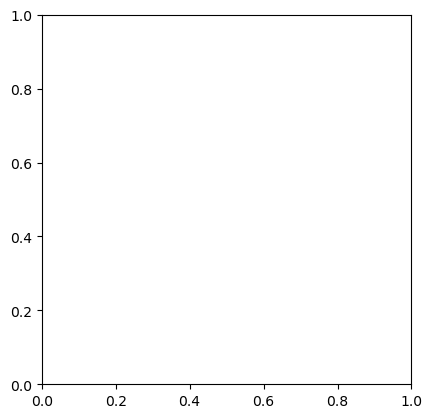

In [4]:
gdf.plot()
plt.show()

In [29]:
print("Numero de filas: " + str(len(gdf)))
print("Numero de columnas: " + str(len(gdf.columns)))
print("Tamaño en memoria: " + str(round(gdf.memory_usage(deep=True).sum()/1024**2,2)) + " MB")
print("Columnas: " + str(gdf.columns.tolist()))
print("Tipos de datos:  \n" + str(gdf.dtypes))

Numero de filas: 32384
Numero de columnas: 9
Tamaño en memoria: 7.62 MB
Columnas: ['comuna', 'barrio', 'codigo_bar', 'manzana', 'estrato', 'fecha_sinc', 'Shape_Leng', 'Shape_Area', 'geometry']
Tipos de datos:  
comuna                object
barrio                object
codigo_bar            object
manzana               object
estrato                int32
fecha_sinc    datetime64[ms]
Shape_Leng           float64
Shape_Area           float64
geometry            geometry
dtype: object


In [46]:
print("Numero de nulos por columna: \n" + str(gdf.isnull().sum()))
print("\n")
print("% de valores nulos respecto al total de registros: " + str(round((gdf.isnull().sum().sum()/len(gdf))*100,2)) + "%")


Numero de nulos por columna: 
comuna          0
barrio          0
codigo_bar      0
manzana       347
estrato         0
fecha_sinc      0
Shape_Leng      0
Shape_Area      0
geometry        0
dtype: int64


% de valores nulos respecto al total de registros: 1.07%


In [ ]:
print("Calidad geométrica: \n" )
print("Geomatrias validas: " +str(gdf.is_valid.sum()))
print("Geomatrias invalidas: " +str(len(gdf)-(gdf.is_valid).sum()))
print("Geometrias vacias: " +str(gdf.is_empty.sum()))
print("tipos de geometria: " +str(gdf.geom_type.unique()))
print("Cantidad de geometrías por tipo: \n" + str(gdf.geom_type.value_counts()))

Calidad geométrica: 

Geomatrias validas: 32242
Geomatrias invalidas: 142
Geometrias vacias: 0
tipos de geometria: ['Polygon' 'MultiPolygon']
Cantidad de geometrías por tipo: 
Polygon         32076
MultiPolygon      308
Name: count, dtype: int64
